# SLU04 - Basic Stats with Pandas: Exercises notebook

In these exercises, we'll use a dataset with information on books from [Goodreads](https://www.goodreads.com/). Goodreads is a platform that allows users to rate and review books. The dataset has been extracted from [Kaggle](https://www.kaggle.com/).

## Objective

The goal of these exercises is for you to learn how to use pandas to obtain simple statistics from datasets. The following will be tested:
- Minimum, maximum, argmin, argmax
- Mean, median & mode
- Standard deviation and variance
- Skewness & Kurtosis
- Quantiles
- Outliers & how to deal with them

## Dataset information

![](media/goodreads.jpg)

This dataset contains a sample of ~57,000 books rated and reviewed by users on Goodreads.

The fields in the dataset are the following:

- `Id`: Book ID on Goodreads
- `Name`: Book title
- `pagesNumber`: Pages for each book
- `Publisher`: Publisher name
- `CountsOfReview`: Counts of text review
- `PublishYear`: Year the book was published
- `Authors`: Book author
- `Rating`: Average rating of the book (0.0 - 5.0)
- `ISBN`: Unique book identifier (International Standard Book Number)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import hashlib

In [2]:
data = pd.read_csv('data/books.csv', delimiter=';').set_index("Id")
data.head()

,Name,pagesNumber,Publisher,CountsOfReview,PublishYear,Authors,Rating,ISBN
Id,,,,,,,,
2,Harry Potter and the Order of the Phoenix (Har...,870,Scholastic Inc.,29770,2004,J.K. Rowling,4.50,439358078
4,Harry Potter and the Chamber of Secrets (Harry...,352,Scholastic,244,2003,J.K. Rowling,4.42,439554896
5,Harry Potter and the Prisoner of Azkaban (Harr...,435,Scholastic Inc.,37093,2004,J.K. Rowling,4.57,043965548X
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",2690,Scholastic,166,2004,J.K. Rowling,4.78,439682584
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",152,Nimble Books,1,2005,W. Frederick Zimmerman,3.79,976540606


----

# Exercise 1

Let's start by performing some descriptive statistics:

- check how many values exist for each column
- sum the `Rating` variable
- check how many different years we have in the `PublishYear`

In [3]:
count_values = data.shape
sum_rating = data.Rating.sum()
publish_years = data.PublishYear.unique()



##### Asserts

In [4]:
count_values_hash = "dc7a392aa24445d85c639c640499a2dc31bb94b416d31c858b74dfa54cca6cc0"
sum_rating_hash = "1be0c791d1c82aaae133a48d5cf9f4c488894a0eef3e354aa33d2e1741aae99c"
publish_years_hash = "e048fc8ef688fbdf7d9717e944b0bc15ebb9774f2ffa8ec030b64d30a77d0d94"

assert count_values_hash == hashlib.sha256(bytes(count_values[0])).hexdigest(), "Incorrect missing values count."
assert sum_rating_hash == hashlib.sha256(bytes(sum_rating)).hexdigest(), "Incorrect sum of ratings."
assert publish_years_hash == hashlib.sha256(bytes(publish_years)).hexdigest(), "Incorrect list of years."

# Exercise 2 

Let's have a look at the `Rating` variable. Find the following information:

- What are the minimum and maximum rating values?
- What is the most common rating?
- What is the average rating?
- What is the median rating?
- What is the standard deviation of the rating?

In [5]:
maximum = data.Rating.max()
minimum = data.Rating.min()
most_common = data.Rating.value_counts().idxmax()
mean = data.Rating.mean()
median = data.Rating.median()
standard_deviation = data.Rating.std()



##### Asserts

In [6]:
np.testing.assert_approx_equal(maximum, 5.0)
np.testing.assert_approx_equal(minimum, 0.0)
assert isinstance(most_common, float), "most_common should be of type float"
np.testing.assert_approx_equal(most_common, 0.0)
np.testing.assert_approx_equal(mean, 3.66, 2)
np.testing.assert_approx_equal(median, 3.90, 2)
np.testing.assert_approx_equal(standard_deviation, 1.01, 2)

----

# Exercise 3 

Let's have a look at the `pagesNumber` variable.

- How many pages has the biggest book? What is its Id? What is its Title?
- How many pages has the smaller book? What is its Id? What is its Title?


In [7]:
number_pages_biggest_book = data.pagesNumber.max()
id_biggest_book = data.pagesNumber.idxmax()
title_biggest_book = data.Name[ data.pagesNumber.idxmax() ]

number_pages_smallest_book = data.pagesNumber.min()
id_smallest_book = data.pagesNumber.idxmin()
title_smallest_book = data.Name[ data.pagesNumber.idxmin() ]



##### Asserts

In [8]:
number_pages_biggest_book_hash = "397cc9a4ac830eb287dcd4f6ad5fdbd9bb0356026b130790026f7d60415d90fa"
id_biggest_book_hash = "c5abddc940877a43d0fea09d3df6136f27d0895c5245ae764b6ee2f85da722b7"
title_biggest_book_hash = "6ce5428314264af44259505ed57cc744a8d80ad958481a1f712fec5adceb153f"

number_pages_smallest_book_hash = "e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855"
id_smallest_book_hash = "11ba380b8f69673109f474ea4e91ea85b0733e1afa1aae9662a8c1b4f243485c"
title_smallest_book_hash = "7ae602589ba763e06517cec687f4613b64c1bd7bd090de7cce09d1e36e6ca28c"

assert number_pages_biggest_book_hash == hashlib.sha256(bytes(number_pages_biggest_book)).hexdigest(), "Wrong answer."\
"Please check the number of pages of the biggest book."
assert id_biggest_book_hash == hashlib.sha256(bytes(id_biggest_book)).hexdigest(), "Wrong answer."\
"Please check the id of the biggest book."
assert title_biggest_book_hash == hashlib.sha256(bytes(title_biggest_book, "utf-8")).hexdigest(), "Wrong answer."\
"Please check the title of the biggest book."
assert number_pages_smallest_book_hash == hashlib.sha256(bytes(number_pages_smallest_book)).hexdigest(), "Wrong answer."\
"Please check the number of pages of the biggest book."
assert id_smallest_book_hash == hashlib.sha256(bytes(id_smallest_book)).hexdigest(), "Wrong answer."\
"Please check the id of the biggest book."
assert title_smallest_book_hash == hashlib.sha256(bytes(title_smallest_book, "utf-8")).hexdigest(), "Wrong answer."\
"Please check the title of the biggest book."

----

# Exercise 4

However, remember that `idxmax` and `idxmin` only return the index of the first of occurrence.

Find how many books are rated with the maximum value.

In [9]:
max_rated_books = data.Name.loc[data.Rating == data.Rating.max()].count()



##### Asserts

In [10]:
max_rated_books_hash = "3449ddf7ca912858ea7e87b19040bf7b9b529099f50d0f3c3388c6c79083ae0b"

assert max_rated_books_hash == hashlib.sha256(bytes(max_rated_books)).hexdigest()

----

# Exercise 5.1

Let's check the distribution of `Rating`.

- plot a histogram for the distribution of `PublishYear` with 20 bins
- check the skewness of the distribution (do you expect it to be positive or negative?)

The skewness measure is -2.776.


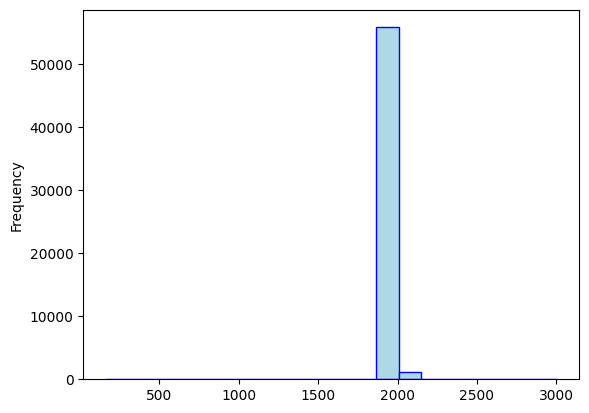

In [11]:
# plot a histogram with 20 bins
data.PublishYear.plot.hist( color= 'lightblue' , edgecolor = 'blue', bins=20)

# compute the skewness measure
skew = data.Rating.skew()
kurt = data.Rating.kurt()


print("The skewness measure is {:.3f}.".format(skew))

#### Asserts

In [12]:
np.testing.assert_approx_equal(skew, -2.776, 2)

----

# Exercise 5.2

Let's check now the kurtosis for the ploted distribution and compar with the normal distribution with the same characteristics

<AxesSubplot:ylabel='Frequency'>

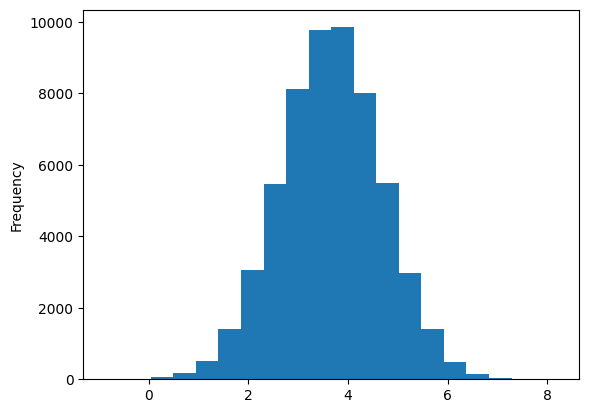

In [13]:
np.random.seed(42) # we set a random seed so all notebooks generate the same random numbers

mean, std, n = data["Rating"].mean(), data["Rating"].std(), data["Rating"].shape[0]
random_normal_returns = np.random.normal(mean, std, n) # here, we generate the random normal distribution
data_normal = pd.Series(data=random_normal_returns, index=data.index)

data_normal.plot.hist(bins=20)

In [14]:
# compute the kurtosis measures
kurt = data.Rating.kurt()
kurt_normal = data_normal.kurt()



print("The kurtosis measure for the data distribution is {:.1f}.".format(kurt))
print("The kurtosis measure for the random normal distribution is {:.1f}.".format(kurt_normal))

The kurtosis measure for the data distribution is 7.5.
The kurtosis measure for the random normal distribution is -0.0.


In [15]:
np.testing.assert_approx_equal(kurt, 7.5, 2)
np.testing.assert_approx_equal(kurt_normal, 0, 0)

# Exercise 6

Find the value of the first, second, and third quartiles of the ploted distribution. Is the second quartile equal to the mean?

In [16]:
# output quartiles as pandas Series
quartiles = [.25, .5, .75]

returns_quartiles = data.Rating.quantile(q=quartiles)
mean_rating = data.Rating.mean()



#### Asserts

In [17]:
assert isinstance(returns_quartiles, pd.Series)
np.testing.assert_approx_equal(returns_quartiles[0.25], 3.62, 2)
np.testing.assert_approx_equal(mean_rating, 3.657, 2)

----

# Exercise 7

There's a pandas method really useful to summarize variables. Do you remember what it is?

Apply the method on the `CountsOfReview` column and investigate the results.

In [18]:
# CountsOfReview_summary ...
CountsOfReview_summary= data.CountsOfReview.describe()
# YOUR CODE HERE
#raise NotImplementedError()

#### Asserts

In [19]:
assert isinstance(CountsOfReview_summary, pd.Series), "Make sure you apply the correct method." \
" It is used to 'describe' the variable. :)"
np.testing.assert_approx_equal(CountsOfReview_summary.max(), 94850.0, 2)

----

# Exercise 8

Let's focus on the outliers for the `CountsOfReview`. First let's check if our data has 0 counts of review:

In [20]:
data.loc[data["CountsOfReview"] == 0].head()

,Name,pagesNumber,Publisher,CountsOfReview,PublishYear,Authors,Rating,ISBN
Id,,,,,,,,
46,Ruby Quickly: Ruby and Rails for the Real World,360,Manning Publications,0,2006,Mark Watson,3.40,1932394745
54,Molly Hatchet - 5 of the Best,56,Cherry Lane Music Company,0,2003,Molly Hatchet,4.33,1575606240
56,The Woodsman and His Hatchet: Eighty Years on ...,150,Stoneydale Press,0,1996,Bud Cheff Sr.,3.60,912299622
108,The Secrets of Frank Herbert's Dune,160,iBooks,0,2000,James Van Hise,3.52,074340730X
131,The Power of One: The Solo Play for Playwright...,240,Heinemann Drama,0,2000,Louis E. Catron,3.67,325001537


There are several CountsOf Review with 0. To simplify for now, let's drop them.

In [21]:
data_non_zero = data.drop(data.loc[data["CountsOfReview"] == 0].index, axis=0)

How to deal with these outliers?

In the Learning Notebook, you learned a few ways to deal with the outliers, in case they are negatively affecting your Machine Learning models. In this exercise, let's explore the **log transformation** and see if it helps us in this case.

Do the following:

- Obtain the mean and the median of the `CountsOfReview`; which one is greater?
- Create a new column named `log_CountsOfReview` with the log of  `CountsOfReview`;
- Obtain the mean and the median of the log of `CountsOfReview`; are they very different from each other?
- Plot log_fund_size using a histogram with 20 bins. Compare the results.
- What do you think? Were the outliers dealt with?

The CountsOfReview has mean 188 and median 12
The log of the CountsOfReview has mean 2.7 and median 2.5


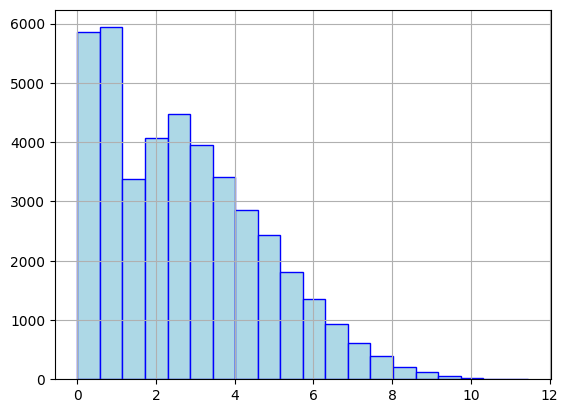

In [27]:
counts_of_review_mean = data_non_zero.CountsOfReview.mean()
counts_of_review_median = data_non_zero.CountsOfReview.median()
data_non_zero["log_CountsOfReview"] = data_non_zero.CountsOfReview.apply(np.log)
log_counts_of_review_mean = data_non_zero.log_CountsOfReview.mean()
log_counts_of_review_median = data_non_zero.log_CountsOfReview.median()

# plot a histogram with 20 bins
data_non_zero.log_CountsOfReview.hist( color= 'lightblue' , edgecolor = 'blue', bins=20)





print('The CountsOfReview has mean %d and median %d' % (counts_of_review_mean, counts_of_review_median))
print('The log of the CountsOfReview has mean %0.1f and median %0.1f' % (log_counts_of_review_mean, log_counts_of_review_median))

#### Asserts

In [28]:
assert math.isclose(counts_of_review_mean, 188.1, abs_tol=0.1)
assert math.isclose(counts_of_review_median, 12, abs_tol=0.1)
assert math.isclose(log_counts_of_review_mean, 2.72, abs_tol=0.01)
assert math.isclose(log_counts_of_review_median, 2.48, abs_tol=0.01)
assert math.isclose(data_non_zero['log_CountsOfReview'].sum(), 114053.23, abs_tol=0.1)

----

Congratulations! You have finished. Good luck with the upcoming SLUs!


![](media/complete.gif)